<a href="https://colab.research.google.com/github/rrodrigo11/Migracionmx/blob/main/Tramites_Migratorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos provenientes de SEGOB Mexico, Reporte que refleja el número de trámites migratorios acumulados en el periodo presentados por país de origen, tipo de trámite, tipo de resolución, edad, género y entidad donde se presenta el trámite.
Periodo que abarca el registro de datos 2015-01-01 a 2018-11-30

URL: https://datos.gob.mx/busca/dataset/instituto-nacional-de-migracion/resource/872a3a28-e822-4c05-9cb0-b0668ca690ec?inner_span=True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path ='/content/tramites-migratorios.csv'

tramites = pd.read_csv(path)

# Tamites migratorios realizados por pais de origen

,Pais de Origen,Total
103,Guatemalteca,97807
194,Venezolana,49066
48,Cubana,35275
83,Estadounidense,35187
43,Colombiana,28868
107,Hondure/a,21624
153,No Aplica Pais,20839
39,China,18662
82,Espa/ola,17214
167,Salvadore/a,13125


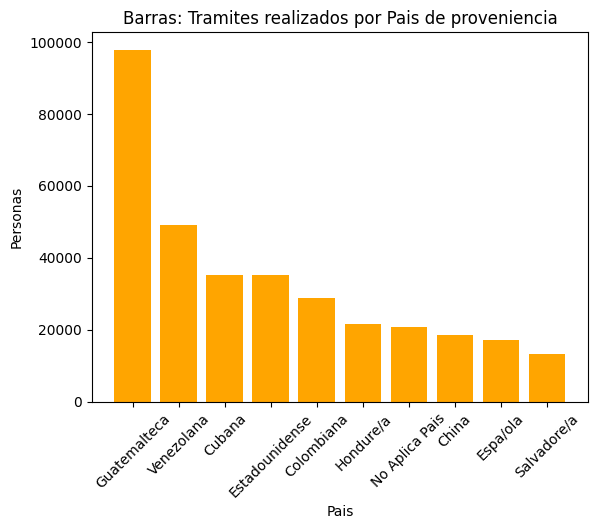

In [ ]:
pais_procedencia = tramites.groupby('Pais de Origen')['Total'].sum().reset_index()
pais_procedencia = pais_procedencia.sort_values(by='Total', ascending=False)
display(pais_procedencia.head(10))
plt.bar(pais_procedencia['Pais de Origen'].head(10), pais_procedencia['Total'].head(10), color='orange')
plt.xlabel('Pais de origen')
plt.ylabel('Tramites realizados')
plt.title('Barras: Tramites realizados por Pais de proveniencia')
plt.xticks(rotation=45)
plt.show()

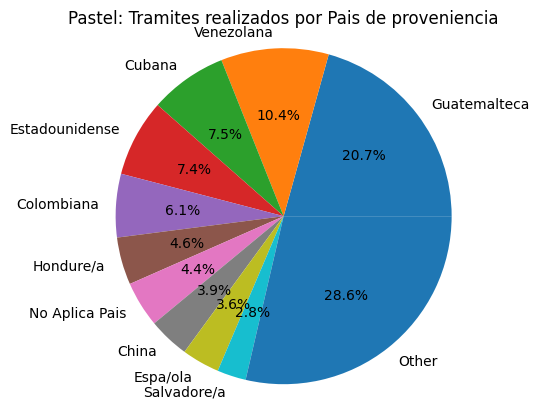

In [ ]:
pais_pastel = tramites.groupby('Pais de Origen')['Total'].sum()
pais_pastel = pais_pastel.sort_values(ascending=False)
top_10 = pais_pastel.head(10)
other_value = pais_pastel[10:].sum()
top_10['Other'] = other_value
plt.pie(top_10, labels=top_10.index, autopct= '%1.1f%%')
plt.title('Pastel: Tramites realizados por Pais de proveniencia')
plt.axis('equal')
plt.show()

# Tramites migratorios por tipo de resulicion

In [ ]:
resolucion = tramites.groupby('Tipo de Resolucion')['Total'].sum()
display(resolucion.sort_values(ascending=False))

Tipo de Resolucion
Resuelto Positivamente                     336951
Sin resolucion                              49604
Sin Resolucion                              49062
Autorizado y enviado a SRE                  15036
Resuelto Negativamente                       8427
Desistimiento por parte del solicitante      6780
Desechado                                    3500
Tramite cancelado                            3450
Tramite cancelado por error                   260
Desistimiento                                  76
Caducado                                        3
Name: Total, dtype: int64

# Tramites migratorios por Pais de Origen & Edad

Edad,18-24 a/os,25-34 a/os,35-44 a/os,45-69 a/os,70 o mas a/os,Menor de edad,No Aplica Edad,Total
Otros,13947,42690,27378,24641,3636,10742,215,123249
Guatemalteca,23888,25822,17728,19586,1826,8939,18,97807
Venezolana,4973,16959,11087,8814,775,6458,0,49066
Cubana,3144,12589,6570,9494,642,2836,0,35275
Estadounidense,4018,4597,4520,16032,3678,2342,0,35187
Colombiana,4008,12671,6471,3277,151,2290,0,28868
Hondure/a,5065,6870,3583,1686,43,4377,0,21624
No Aplica Pais,0,0,0,0,2233,0,18606,20839
China,3222,7408,4500,2720,31,781,0,18662
Espa/ola,894,5179,4930,4394,306,1511,0,17214


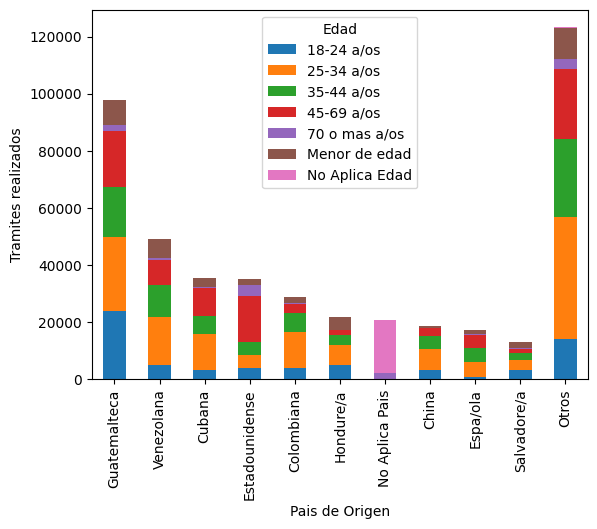

In [ ]:
resolucion_edades = pd.pivot_table(tramites, values='Total', index='Pais de Origen', columns='Edad', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')
resolucion_edades = resolucion_edades.sort_values(by='Total', ascending=False)
top_10_resolucion = resolucion_edades.iloc[1:11]

other_value = pd.DataFrame(resolucion_edades.iloc[12:].sum()).T
other_value = other_value.set_index(pd.Index(['Otros']))
top_10_resolucion = pd.concat([top_10_resolucion, other_value])

display(top_10_resolucion.sort_values(by = 'Total', ascending = False))
top_10_total = top_10_resolucion['Total']
top_10_resolucion = top_10_resolucion.drop('Total', axis=1)

top_10_resolucion.plot(kind='bar', stacked=True)
plt.xlabel('Pais de Origen')
plt.ylabel('Tramites realizados')
plt.show()


# Tramites realizados en Entidades federativas

In [ ]:
tramites_genero = tramites.iloc[:,1:133]
tramites_genero = tramites_genero.drop('Tipo de Resolucion', axis=1)
tramites_genero = tramites_genero.drop('Tramite', axis=1)
tramites_genero = tramites_genero.drop('Edad', axis=1)

display(tramites_genero)

,Pais de Origen,Aguascalientes Hombre,Aguascalientes Mujer,Aguascalientes No Aplica Sexo,Aguascalientes No Determinado,Baja California Hombre,Baja California Mujer,Baja California No Aplica Sexo,Baja California No Determinado,Baja California Sur Hombre,...,Veracruz de Ignacio de la Llave No Aplica Sexo,Veracruz de Ignacio de la Llave No Determinado,Yucatan Hombre,Yucatan Mujer,Yucatan No Aplica Sexo,Yucatan No Determinado,Zacatecas Hombre,Zacatecas Mujer,Zacatecas No Aplica Sexo,Zacatecas No Determinado
0,Apatrida,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Apatrida,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Apatrida,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apatrida,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Apatrida,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34831,Estadounidense (Guam),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34832,Estadounidense (Guam),0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34833,Francesa (San Martin),0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34834,Samoana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
